<a href="https://colab.research.google.com/github/mchivuku/csb659-project/blob/master/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DCGAN in Pytorch
##Network architecture

![alt text](https://github.com/last-one/DCGAN-Pytorch/blob/master/DCGAN.png?raw=true)

PyTorch implementation of Deep Convolutional Generative Adversarial Networks (DCGAN), which is a stabilize Generative Adversarial Networks. The origin code can be found here.


### Generator


*   input: a vector with z_size
*   hidden layers: Four 4x4 transposed convolutional layers (1024, 512, 256, and 128 kernels, respectively) with ReLU
*   output layer: 4x4 transposed convolutional layer (channel_size kernels, 4096 nodes = 64x64 size image) with Tanh.
*   BatchNormalization is used except for output layer.


### Discriminator


*   input: a vector with channel_size * image_size * image_size.

*   hidden layers: Four 4x4 convolutional layers (128, 256, 512, and 1024 kernels, respectively) with LeakyReLU (negative slope is 0.2).

*  output layer: 4x4 convolutional layer (1 node) with Sigmoid.

*  BatchNormalization is used except for 1st hidden layer and output layer.



All of the transposed convolutional layer and convolutional layer are initilized by a normal distribution with 0.0 mean and 0.02 std


For MNIST image, the channel_size is 1 and image_size is 64.









In [1]:
from google.colab import drive

drive.mount("/content/drive")

%cd /content/drive/My\ Drive/Masters-DS/CSCI-B659/project/examples/dcgan

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Masters-DS/CSCI-B659/project/examples/dcgan


## Models

In [0]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F

# G(z)
class generator(nn.Module):
    '''
        Generative Network
    '''
    def __init__(self, z_size=100, out_size=3, ngf=128):
        super(generator, self).__init__()
        self.z_size = z_size
        self.ngf = ngf
        self.out_size = out_size

        self.main = nn.Sequential(
            # input size is z_size
            nn.ConvTranspose2d(self.z_size, self.ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.ngf * 8),
            nn.ReLU(inplace=True),
            # state size: (ngf * 8) x 4 x 4
            nn.ConvTranspose2d(self.ngf * 8, self.ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 4),
            nn.ReLU(inplace=True),
            # state size: (ngf * 4) x 8 x 8
            nn.ConvTranspose2d(self.ngf * 4, self.ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 2),
            nn.ReLU(inplace=True),
            # state size: (ngf * 2) x 16 x 16
            nn.ConvTranspose2d(self.ngf * 2, self.ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf),
            nn.ReLU(inplace=True),
            # state size: ngf x 32 x 32
            nn.ConvTranspose2d(self.ngf, self.out_size, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size: out_size x 64 x 64
        )

        for m in self.modules():
            if isinstance(m, nn.ConvTranspose2d):
                m.weight.data.normal_(0.0, 0.02)
                if m.bias is not None:
                    m.bias.data.zero_()

    def forward(self, input):

        output = self.main(input)

        return output
      
      
      
# D
class discriminator(nn.Module):
    '''
        Discriminative Network
    '''
    def __init__(self, in_size=3, ndf=128):
        super(discriminator, self).__init__()
        self.in_size = in_size
        self.ndf = ndf

        self.main = nn.Sequential(
            # input size is in_size x 64 x 64
            nn.Conv2d(self.in_size, self.ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: ndf x 32 x 32
            nn.Conv2d(self.ndf, self.ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: (ndf * 2) x 16 x 16
            nn.Conv2d(self.ndf * 2, self.ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: (ndf * 4) x 8 x 8
            nn.Conv2d(self.ndf * 4, self.ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: (ndf * 8) x 4 x 4
            nn.Conv2d(self.ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
            # state size: 1 x 1 x 1
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                m.weight.data.normal_(0.0, 0.02)
                if m.bias is not None:
                    m.bias.data.zero_()

    def forward(self, input):

        output = self.main(input)

        return output
      

## Params

In [0]:
workers= 6
display= 100
epoches= 20
batch_size= 128
base_lr= 0.0002
beta1= 0.5

dataset= 'MNIST'
image_size= 64
z_size= 100
channel_size=1
ngf= 128
ndf= 128
  

## Helper functions

In [0]:
import time
import torch
import torch.utils.data as data
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import time

def plot_loss(d_loss, g_loss, num_epoch, epoches, save_dir):
    
    fig, ax = plt.subplots()
    ax.set_xlim(0,epoches + 1)
    ax.set_ylim(0, max(np.max(g_loss), np.max(d_loss)) * 1.1)
    plt.xlabel('Epoch {}'.format(num_epoch))
    plt.ylabel('Loss')
    
    plt.plot(range(1, num_epoch + 1), d_loss, label='Discriminator', color='red', linewidth=3)
    plt.plot(range(1, num_epoch + 1), g_loss, label='Generator', color='mediumblue', linewidth=3)
    
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'DCGAN_loss_epoch_{}.png'.format(num_epoch)))
    plt.close()
    
    
def plot_result(G, fixed_noise, image_size, num_epoch, save_dir, fig_size=(8, 8), is_gray=False):

    G.eval()
    generate_images = G(fixed_noise)
    G.train()
    
    n_rows = n_cols = 8
    fig, axes = plt.subplots(n_rows, n_cols, figsize=fig_size)
    
    for ax, img in zip(axes.flatten(), generate_images):
        ax.axis('off')
        ax.set_adjustable('box-forced')
        if is_gray:
            img = img.cpu().data.view(image_size, image_size).numpy()
            ax.imshow(img, cmap='gray', aspect='equal')
        else:
            img = (((img - img.min()) * 255) / (img.max() - img.min())).cpu().data.numpy().transpose(1, 2, 0).astype(np.uint8)
            ax.imshow(img, cmap=None, aspect='equal')
    plt.subplots_adjust(wspace=0, hspace=0)
    title = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, title, ha='center')
    
    plt.savefig(os.path.join(save_dir, 'DCGAN_epoch_{}.png'.format(num_epoch)))
    plt.close()
    
    
    
## Save checkpoint
def save_checkpoint(state, filename='checkpoint'):
    
    torch.save(state, filename + '.pth.tar')

    
"""
Print logs
"""
def print_log(epoch, epoches, iteration, iters, learning_rate,
              display, D_losses, G_losses):
    print('epoch: [{}/{}] iteration: [{}/{}]\t Learning rate: {}, D_loss: {:.4f}, G_loss:{:.4f}'.format(epoch, epoches, iteration, iters, learning_rate,D_losses(),G_losses()))
   
   

## Running Average

In [0]:
class RunningAverage ():
    """A simple class that maintains the running average of a quantity
    Example:
    ```
    loss_avg = RunningAverage()
    loss_avg.update(2)
    loss_avg.update(4)
    loss_avg() = 3
    ```
    """

    def __init__( self ):
        self.steps = 0
        self.total = 0

    def update( self, val ):
        self.total += val
        self.steps += 1
    
    def reset(self):
        self.steps = 0.
        self.total = 0.
        
        
        
    def __call__( self ):
        return self.total / float ( self.steps )

In [97]:
G = generator(z_size=z_size, out_size=channel_size, ngf=ngf).cuda()
print('G network structure')
print(G)
D = discriminator(in_size=channel_size, ndf=ndf).cuda()
print('D network structure')
print(D)

G network structure
generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()


## Training

In [0]:
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

%matplotlib inline
# setup loss function
criterion = nn.BCELoss().cuda()

# setup optimizer
optimizerD = torch.optim.Adam(D.parameters(), lr=base_lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(G.parameters(), lr=base_lr, betas=(beta1, 0.999))


# setup some varibles
batch_time = RunningAverage()
data_time = RunningAverage()
D_losses = RunningAverage()
G_losses = RunningAverage()


fixed_noise = torch.FloatTensor(8 * 8,  z_size, 1, 1).normal_(0, 1)
fixed_noise = Variable(fixed_noise.cuda())

In [99]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets


path=""

train_loader = torch.utils.data.DataLoader(
                datasets.MNIST("./data/", True,
                    transforms.Compose([transforms.Scale(image_size),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,), std=(0.5,)),
                ]), download=True),
                batch_size=batch_size, shuffle=True,
                num_workers=workers, pin_memory=True)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [0]:
## Show image
import torchvision
def show_image(img,title=None):
  
  """Imshow for Tensor."""
  
  plt.figure(figsize=(16,4))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  
def plot_grid(inputs):
  # Make a grid from batch 
  out = torchvision.utils.make_grid(inputs,10,10)
  show_image(out, title="")
  



In [116]:
# enable training for the models
D.train()
G.train()
D_loss_list = []
G_loss_list = []
cudnn.benchmark = True
save_dir="./results/"
for epoch in range(epoches):
  for i, (input, _) in enumerate(train_loader):
   
    batch_size = input.size(0)
    input_var = Variable(input.cuda())
    
    # Train discriminator with real data
    real_labels = torch.ones(batch_size)
    label_real_var = Variable(real_labels.cuda())
    
    D_real_result = D(input_var)
    
    D_real_loss = criterion(D_real_result.squeeze(),label_real_var)
    
    ## Train discriminator on fake data
    fake_labels = torch.zeros(batch_size)
    label_fake_var = Variable(fake_labels.cuda())

    noise = torch.randn((batch_size, z_size)).view(-1,z_size,1,1)
    noise_var = Variable(noise.cuda())
    
    G_result = G(noise_var)
    
    D_fake_result = D(G_result).squeeze()
    D_fake_loss = criterion(D_fake_result, label_fake_var)
    
    ## back propagation - Discriminator
    D_total_loss = D_real_loss + D_fake_loss
    D_losses.update(D_total_loss.item())
    
    D.zero_grad()
    D_total_loss.backward()
    optimizerD.step()
    
    """
    Generator
    """
    noise = torch.randn((batch_size, z_size)).view(-1, z_size, 1, 1)
    noise_var = Variable(noise.cuda())
    G_result = G(noise_var)
    D_fake_result = D(G_result).squeeze()
    G_loss = criterion(D_fake_result, label_real_var)
    
    G_losses.update(G_loss.item())
    ##back propagate
    G.zero_grad()
    G_loss.backward()
    optimizerG.step()
    
    if (i + 1) % display == 0:
      print_log(epoch + 1, epoches, i + 1, len(train_loader), base_lr,
                  display, D_losses, G_losses)
      
  
  D_loss_list.append(D_losses())
  G_loss_list.append(G_losses())
  D_losses.reset()
  G_losses.reset()  
  
  # plt the generate images and loss curve
  plot_result(G, fixed_noise, image_size, epoch + 1, save_dir=save_dir  is_gray=(channel_size == 1))
  plot_loss(D_loss_list, G_loss_list, epoch + 1, epoches, save_dir)
  # save the D and G.
  save_checkpoint({'epoch': epoch, 'state_dict': D.state_dict(),}, os.path.join(save_dir, 'D_epoch_{}'.format(epoch)))
  save_checkpoint({'epoch': epoch, 'state_dict': G.state_dict(),}, os.path.join(save_dir, 'G_epoch_{}'.format(epoch)))

  
  
        
     
    

epoch: [1/20] iteration: [100/469]	 Learning rate: 0.0002, D_loss: 0.9100, G_loss:2.3411
epoch: [1/20] iteration: [200/469]	 Learning rate: 0.0002, D_loss: 0.8388, G_loss:2.3285
epoch: [1/20] iteration: [300/469]	 Learning rate: 0.0002, D_loss: 0.7849, G_loss:2.3875
epoch: [1/20] iteration: [400/469]	 Learning rate: 0.0002, D_loss: 0.7446, G_loss:2.4682


TypeError: ignored

In [0]:
D_losses.reset()

DCGAN_epoch_1.png


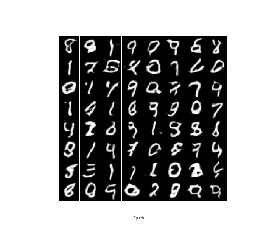

In [124]:
#os.makedirs("./results/")
#plot_result(G, fixed_noise, image_size, epoch + 1, save_dir=save_dir , is_gray=(channel_size == 1))
import imageio

plt.imshow(imageio.imread("./results/DCGAN_epoch_1.png"))
plt.axis("off")



In [125]:
%ls ./results

DCGAN_epoch_1.png  DCGAN_loss_epoch_1.png


(-0.5, 431.5, 287.5, -0.5)

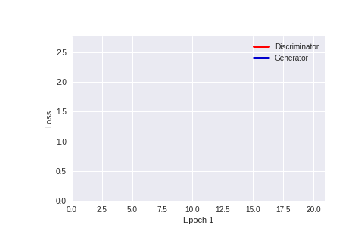

In [126]:
plt.imshow(imageio.imread("./results/DCGAN_loss_epoch_1.png"))
plt.axis("off")